### Embeddings 

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
import cohere
import pandas as pd
co = cohere.Client(os.environ['COHERE_API_KEY'])

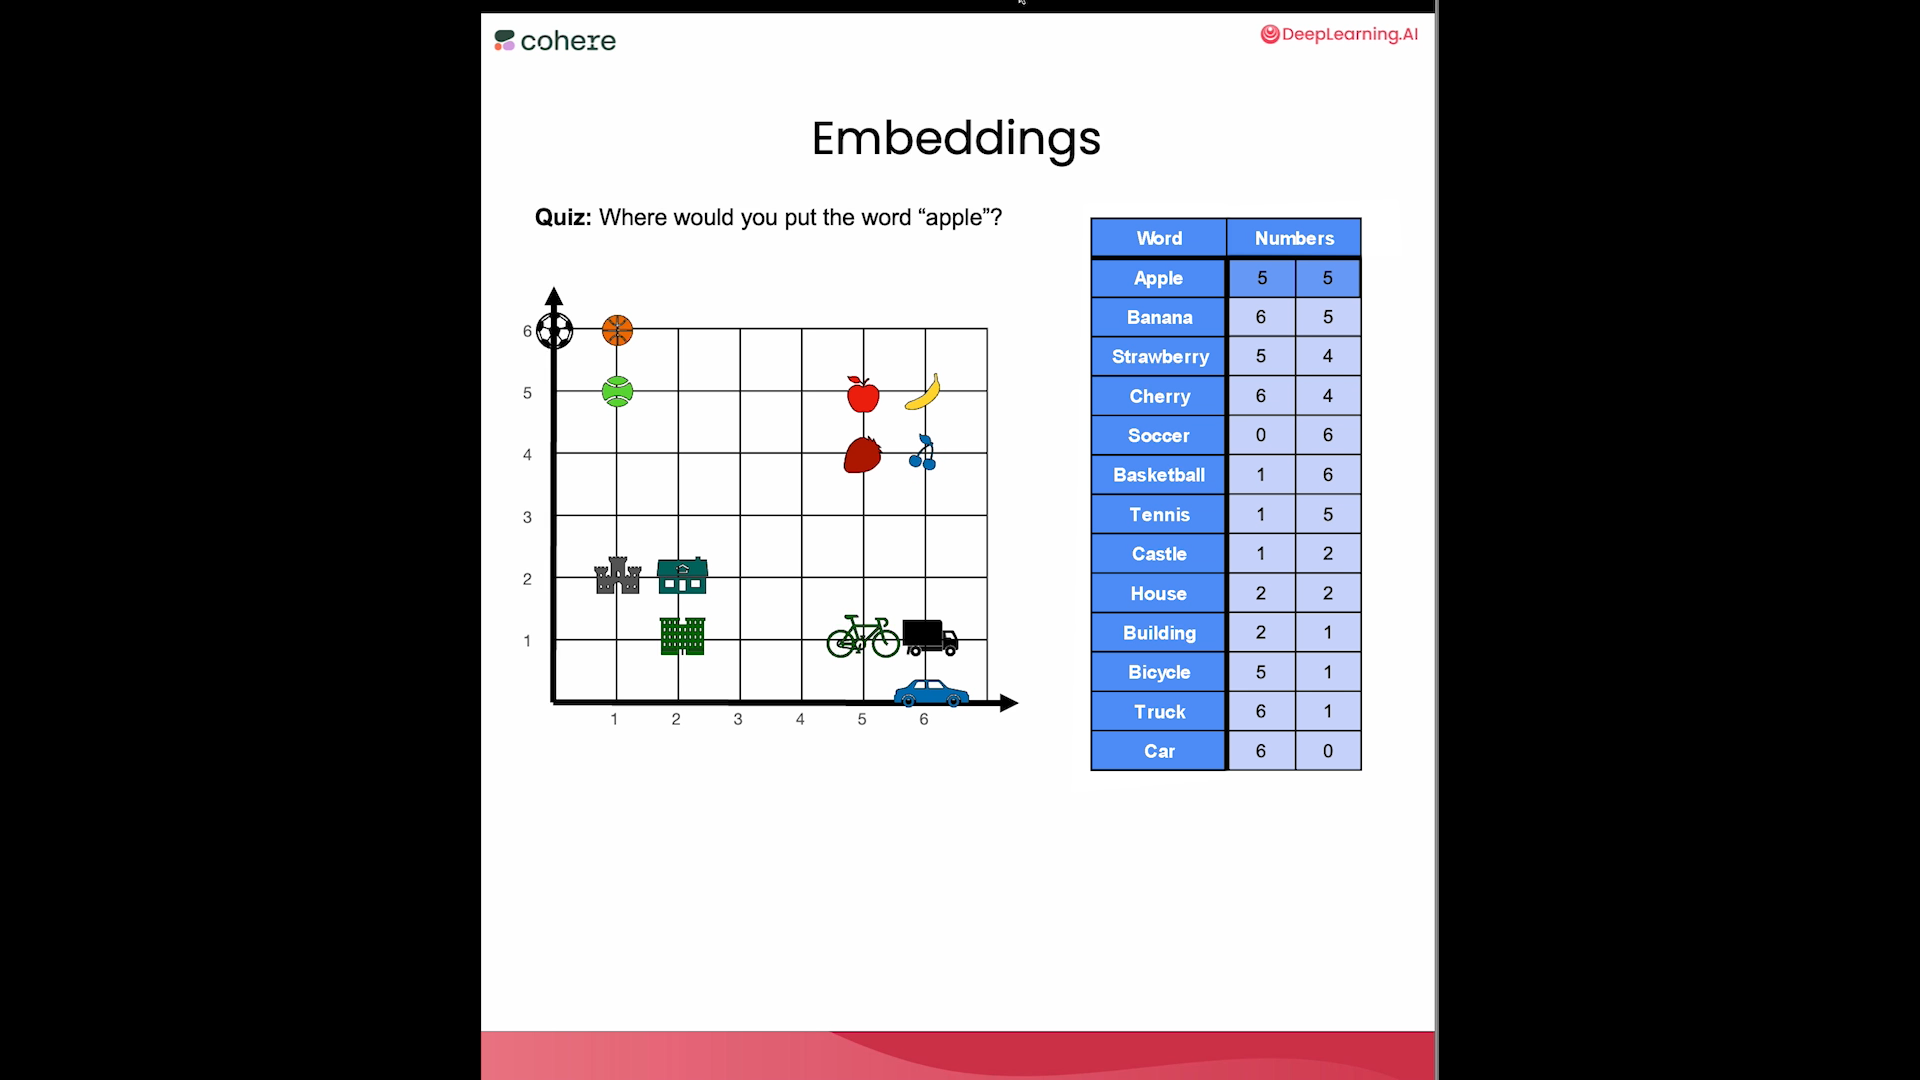

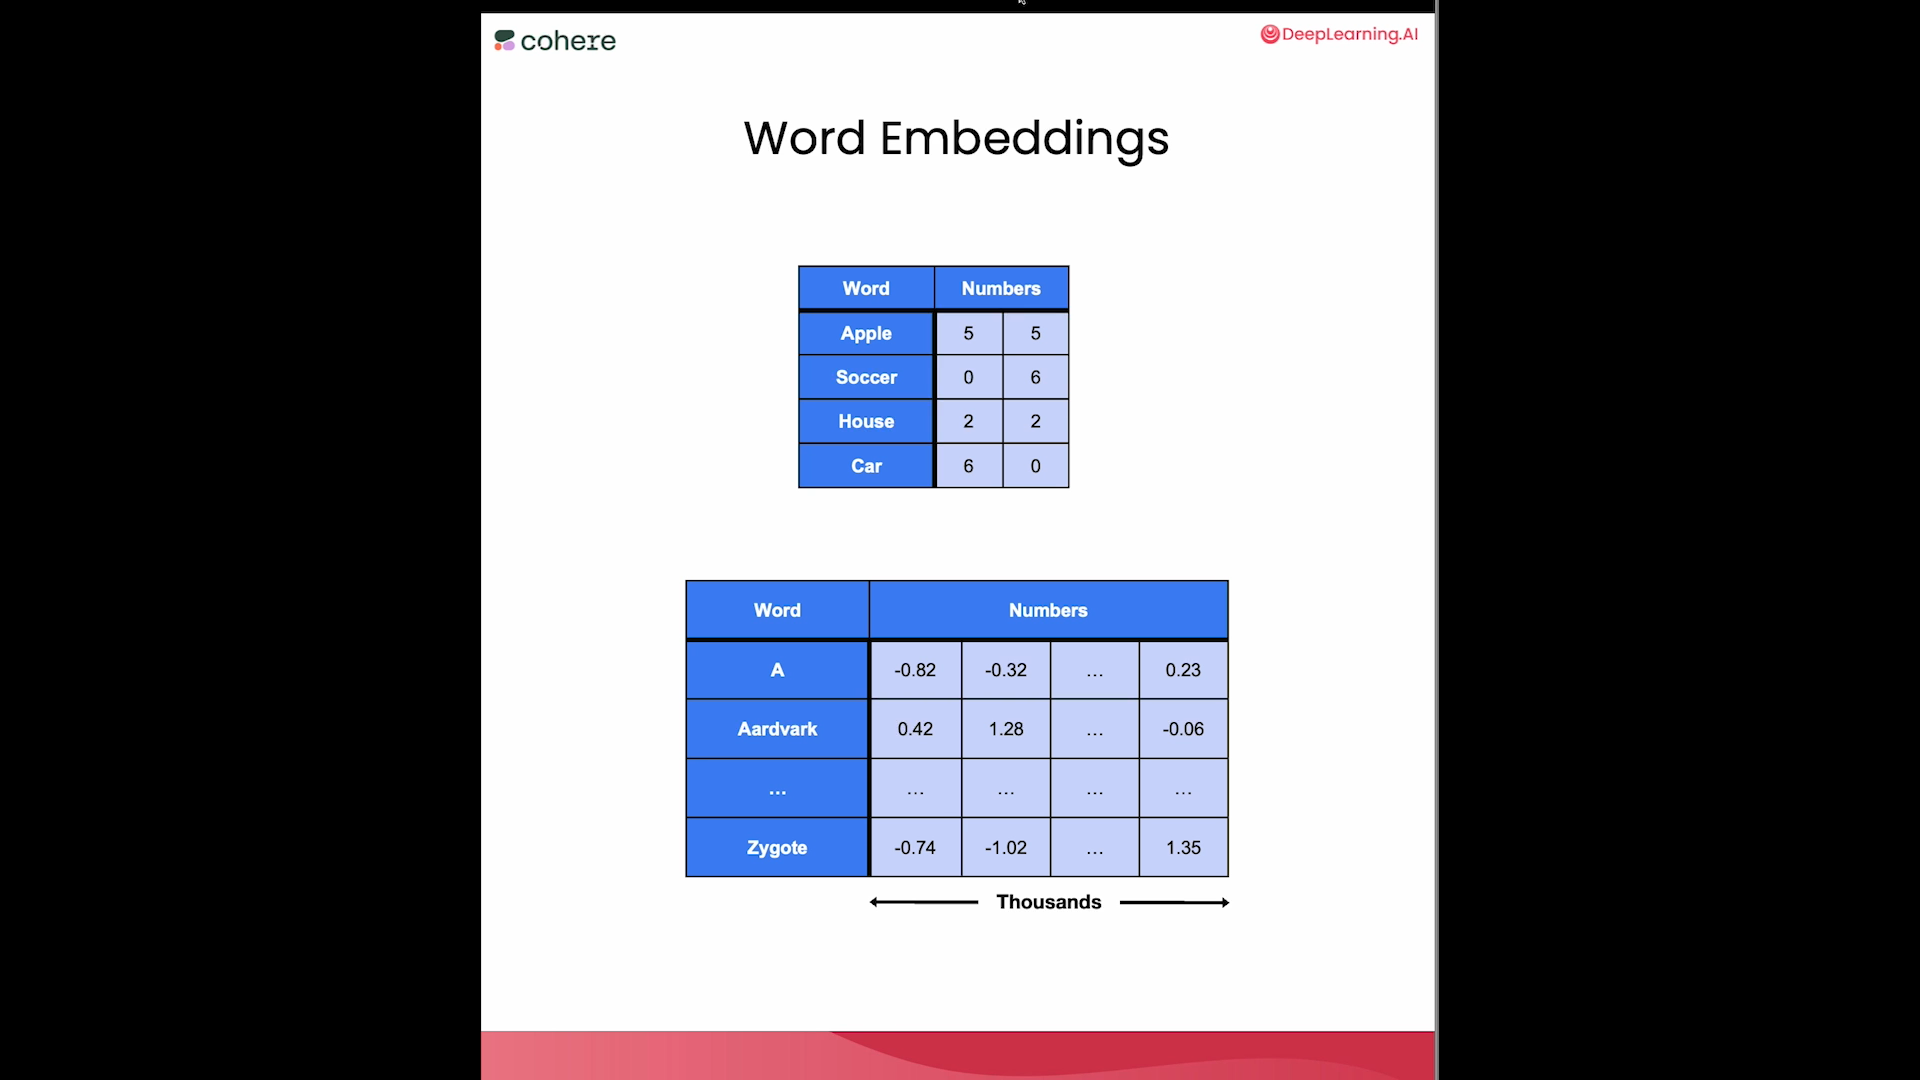

#### Word Embeddings

Consider a very small dataset of three words.

In [2]:
three_words = pd.DataFrame({'text':
  [
      'joy',
      'happiness',
      'potato'
  ]})

three_words

,text
0,joy
1,happiness
2,potato


In [3]:
three_words_emb = co.embed(texts=list(three_words['text']),
                           model='embed-english-v2.0').embeddings
three_words_emb

[[2.3203125,
  -0.18334961,
  -0.578125,
  -0.7314453,
  -2.2050781,
  -2.59375,
  0.35205078,
  -1.6220703,
  0.27954102,
  0.3083496,
  -1.2783203,
  0.82128906,
  1.3642578,
  0.124572754,
  -1.8779297,
  -0.011421204,
  1.2539062,
  -1.7041016,
  -0.4777832,
  -1.6103516,
  1.4697266,
  0.8261719,
  1.078125,
  -1.2880859,
  0.2775879,
  0.2866211,
  1.9394531,
  -0.6777344,
  0.19055176,
  0.8574219,
  -0.7631836,
  1.6396484,
  2.8164062,
  1.390625,
  -0.3552246,
  0.77490234,
  -0.2836914,
  -0.6142578,
  0.7182617,
  0.26611328,
  0.2800293,
  -0.4140625,
  1.7714844,
  -1.6982422,
  0.65283203,
  0.15466309,
  -1.4111328,
  1.0097656,
  -1.0585938,
  0.03286743,
  -0.03164673,
  0.22998047,
  3.2539062,
  1.7900391,
  -0.72021484,
  -1.2861328,
  -2.1015625,
  -2.2675781,
  0.3383789,
  -1.6943359,
  0.7807617,
  2.09375,
  -0.37963867,
  0.69433594,
  -0.0859375,
  1.7265625,
  -1.6025391,
  -2.703125,
  -1.7636719,
  0.64990234,
  4.0039062,
  -0.5727539,
  1.4990234,
  1.3

In [4]:
word_1 = three_words_emb[0]
word_2 = three_words_emb[1]
word_3 = three_words_emb[2]
word_1[:10] ## word1 - joy

[2.3203125,
 -0.18334961,
 -0.578125,
 -0.7314453,
 -2.2050781,
 -2.59375,
 0.35205078,
 -1.6220703,
 0.27954102,
 0.3083496]

#### Sentence Embeddings

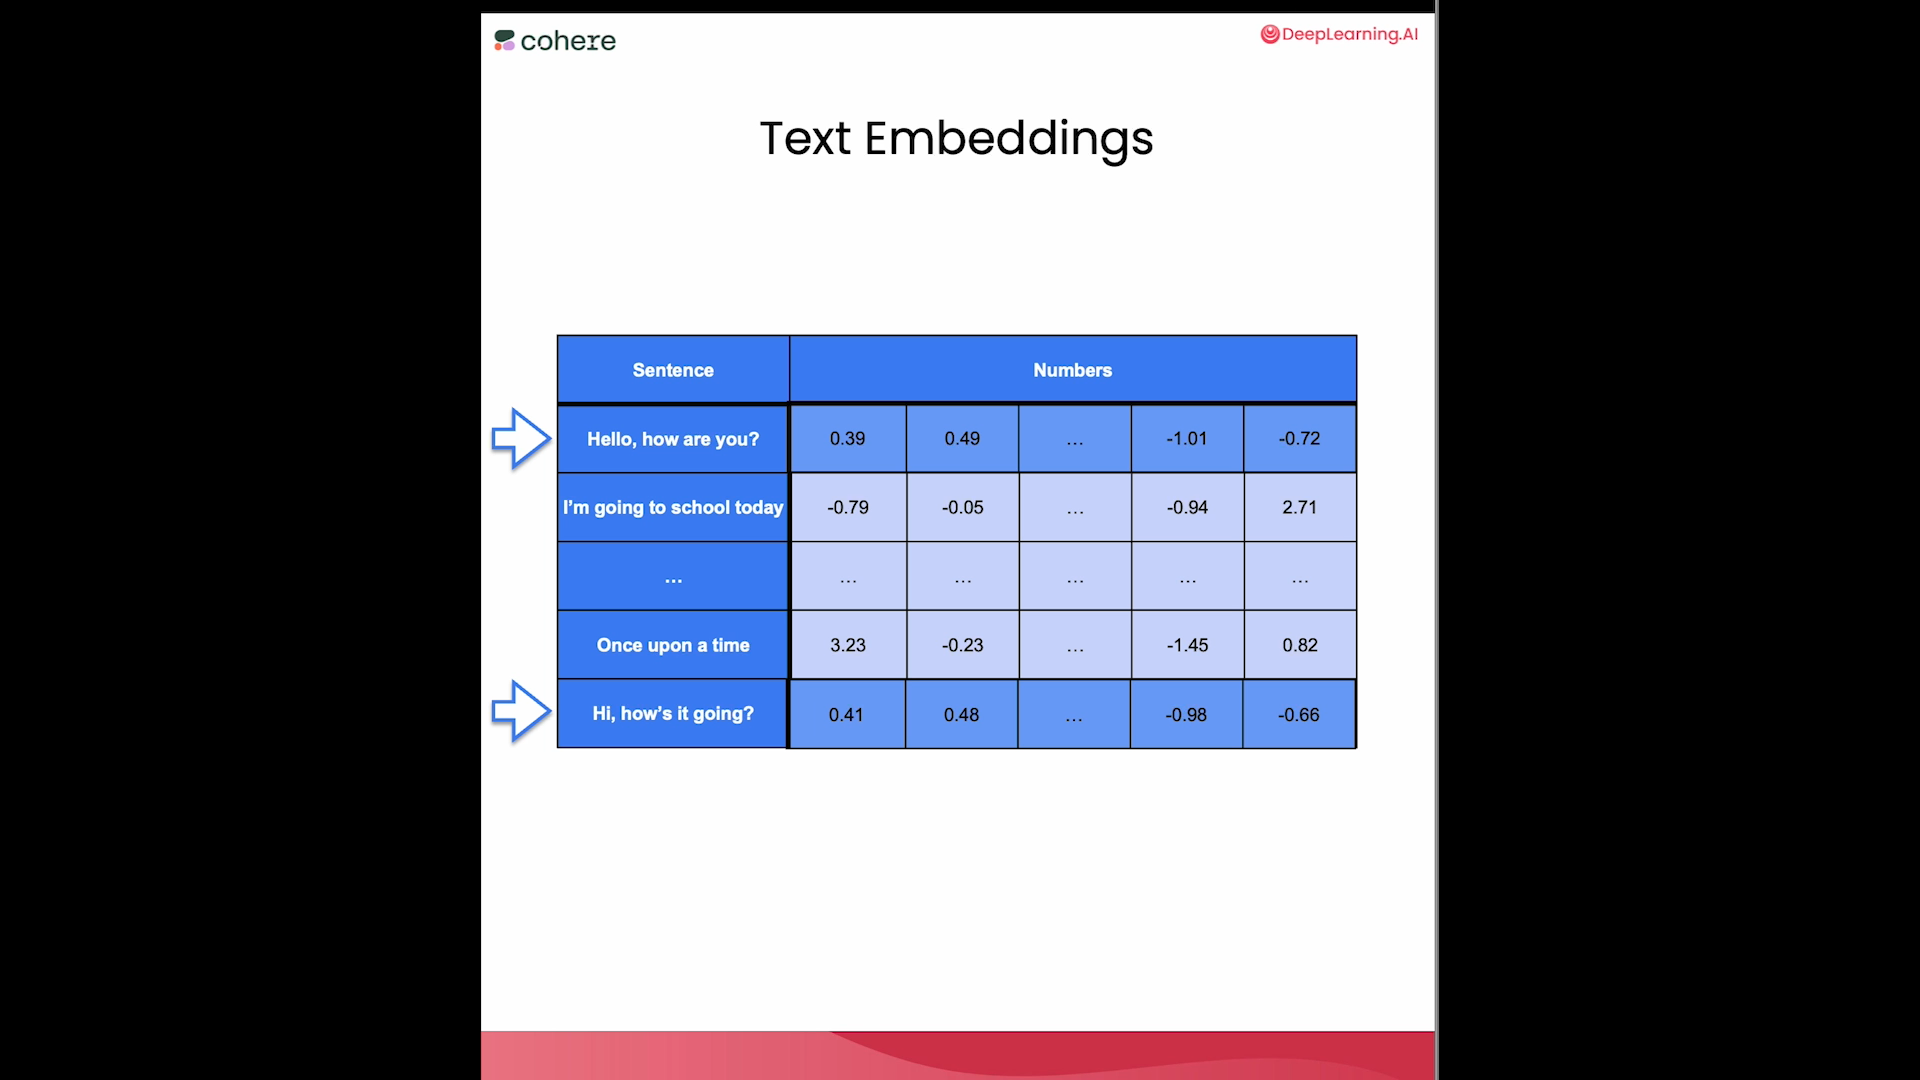

In [5]:
sentences = pd.DataFrame({'text':
  [
   'Where is the world cup?',
   'The world cup is in Qatar',
   'What color is the sky?',
   'The sky is blue',
   'Where does the bear live?',
   'The bear lives in the the woods',
   'What is an apple?',
   'An apple is a fruit',
  ]})

sentences


,text
0,Where is the world cup?
1,The world cup is in Qatar
2,What color is the sky?
3,The sky is blue
4,Where does the bear live?
5,The bear lives in the the woods
6,What is an apple?
7,An apple is a fruit


In [6]:
emb = co.embed(texts=list(sentences['text']),
               model='embed-english-v2.0').embeddings

# Explore the 10 first entries of the embeddings of the 3 sentences:
for e in emb:
    print(e[:3])

[0.27319336, -0.37768555, -1.0273438]
[0.49804688, 1.2236328, 0.4074707]
[-0.23571777, -0.9375, 0.9614258]
[0.08300781, -0.32080078, 0.9272461]
[0.49780273, -0.35058594, -1.6171875]
[1.2294922, -1.3779297, -1.8378906]
[0.15686035, -0.92041016, 1.5996094]
[1.0761719, -0.7211914, 0.9296875]


In [7]:
len(emb[0])

4096

In [ ]:
import umap
import altair as alt
from utils import umap_plot
chart = umap_plot(sentences, emb)
chart.interactive()


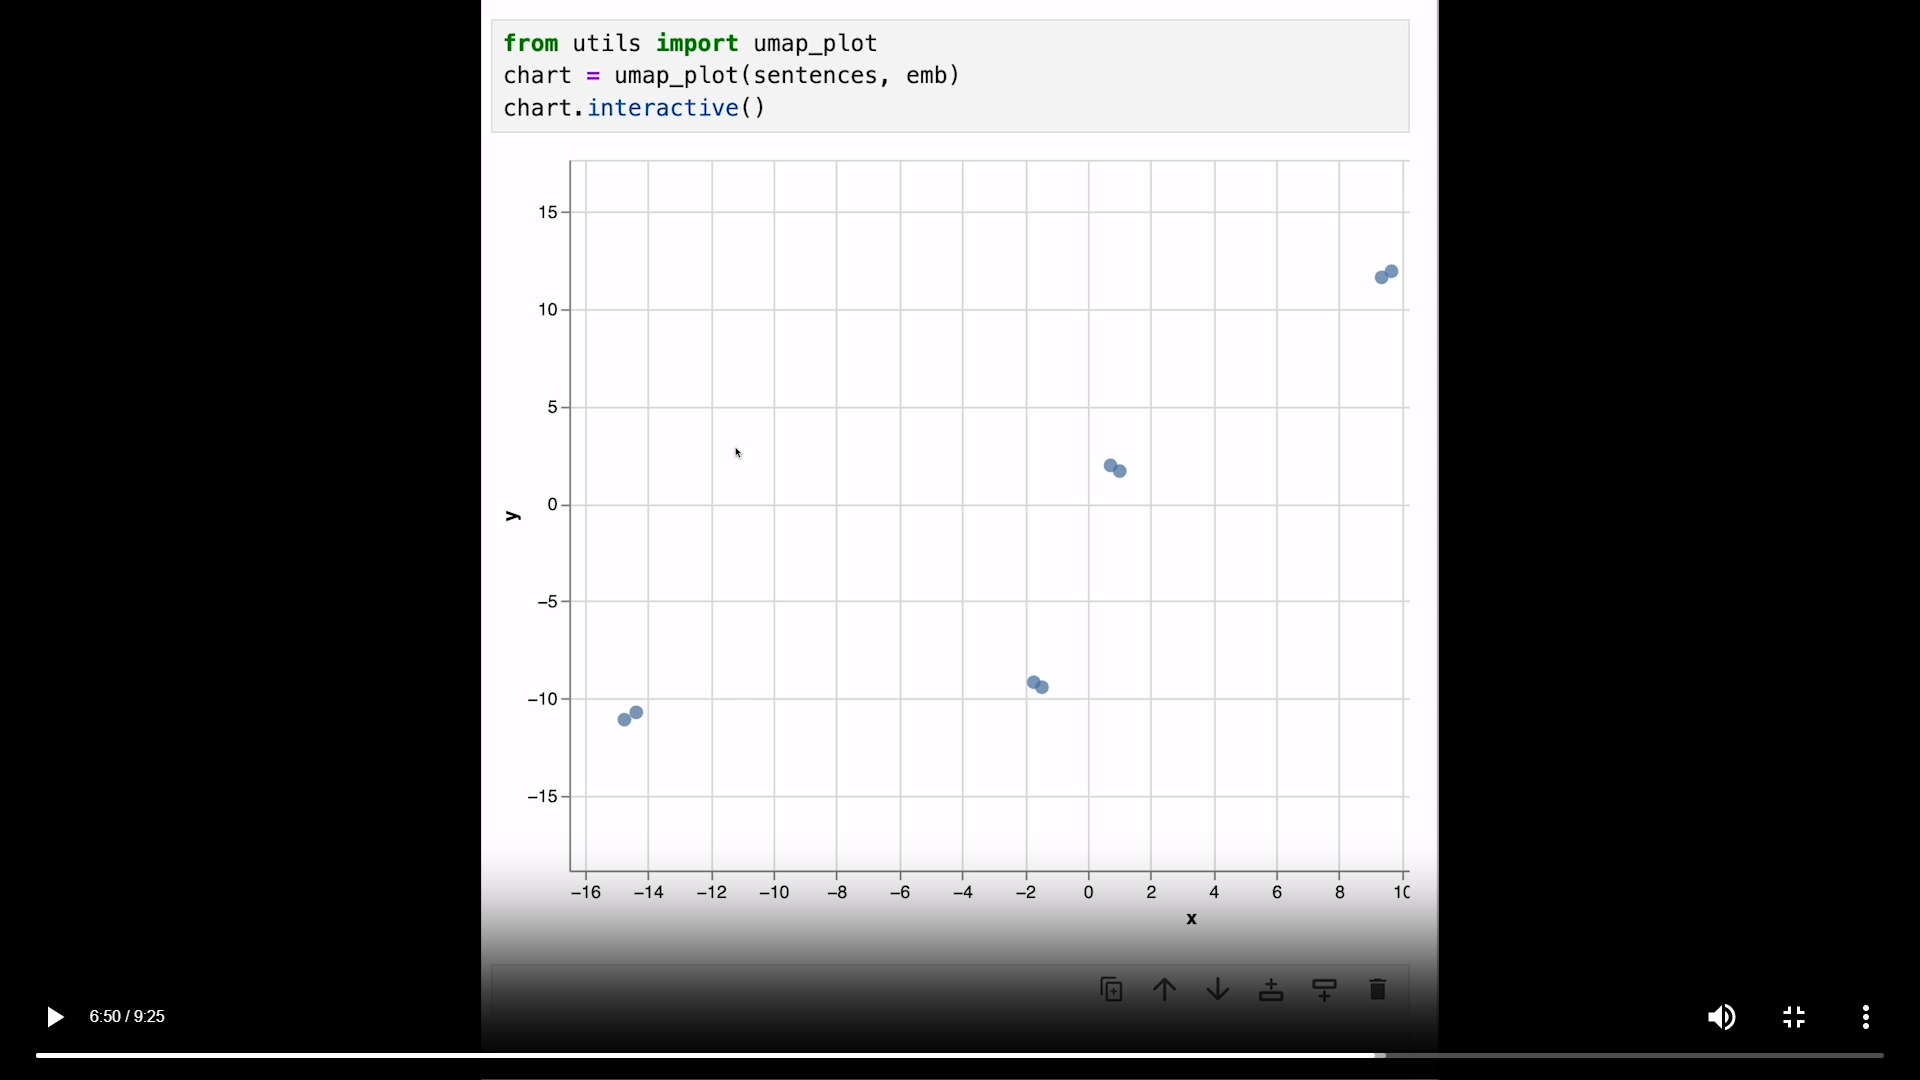

#### Articles Embeddings

In [ ]:
import pandas as pd
wiki_articles = pd.read_pickle('wikipedia.pkl')
wiki_articles

import numpy as np
from utils import umap_plot_big

articles = wiki_articles[['title', 'text']]
embeds = np.array([d for d in wiki_articles['emb']])

chart = umap_plot_big(articles, embeds)
chart.interactive()

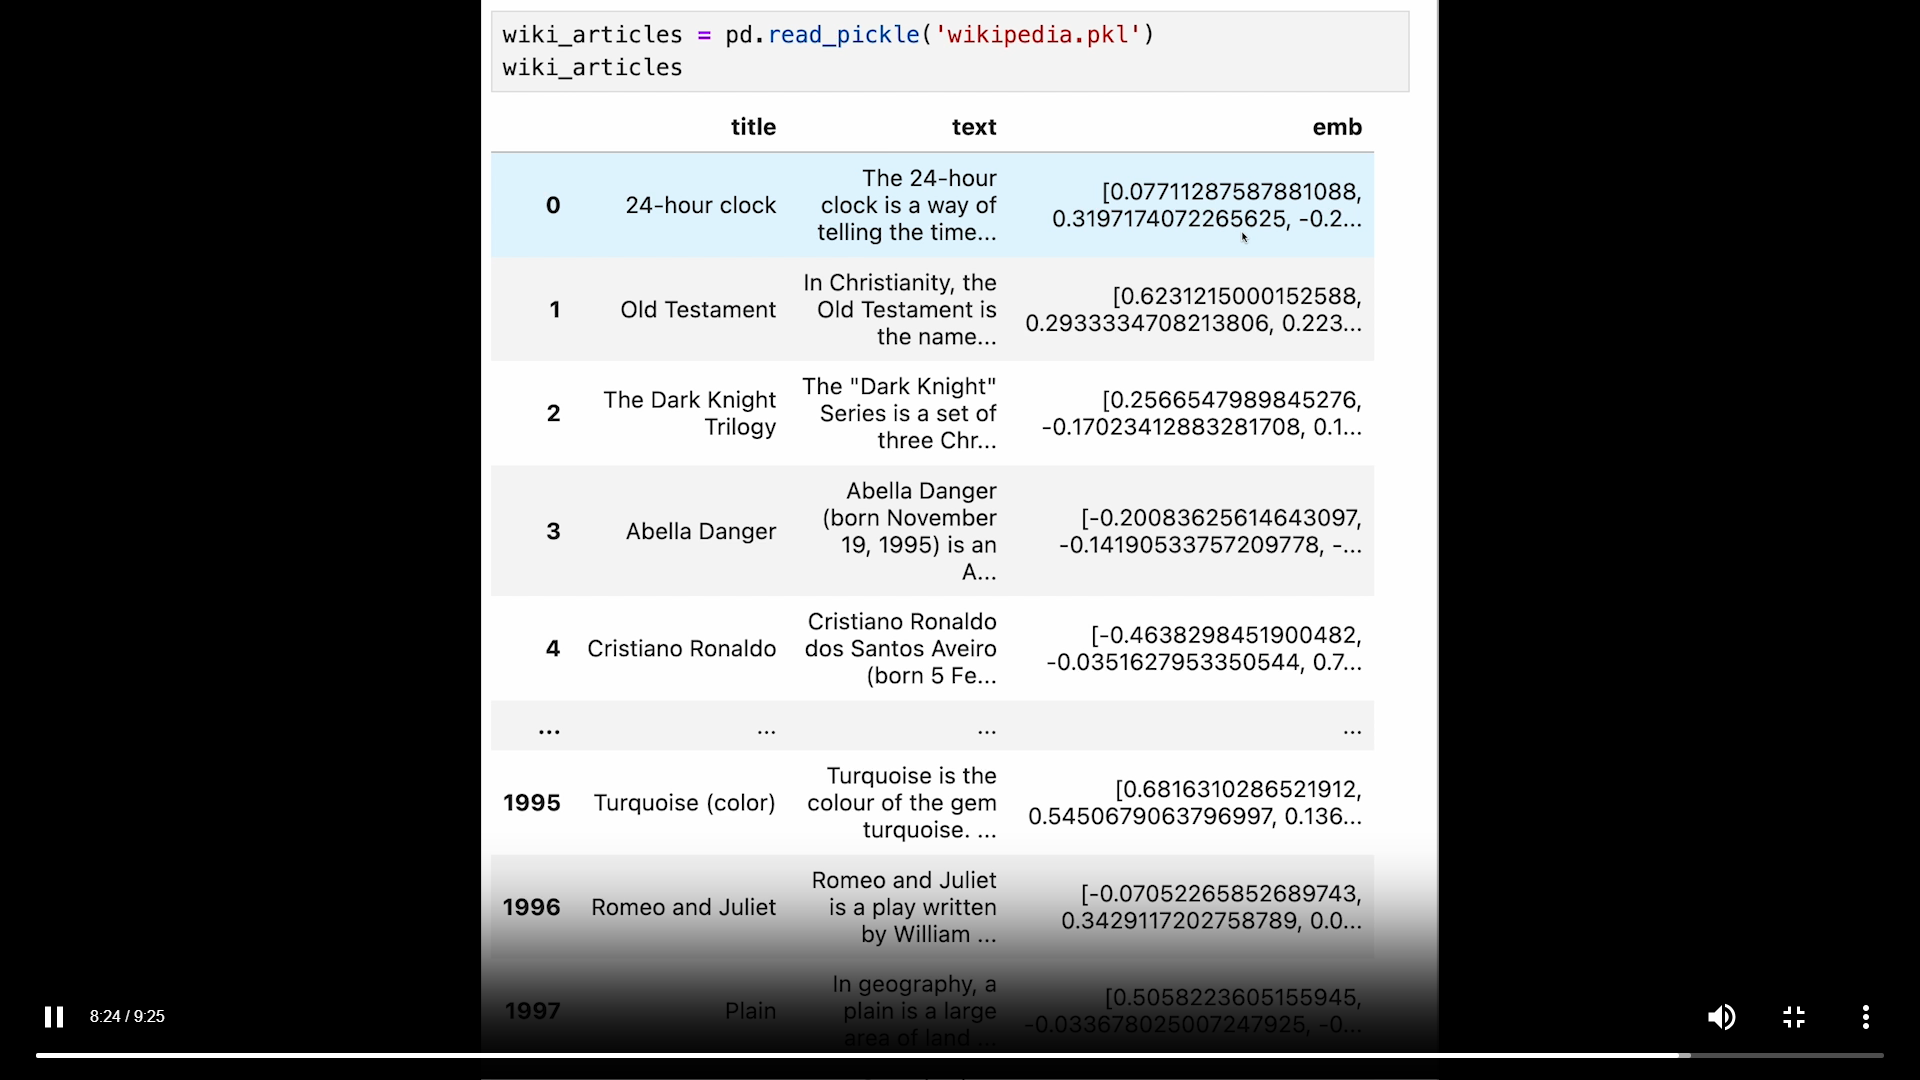

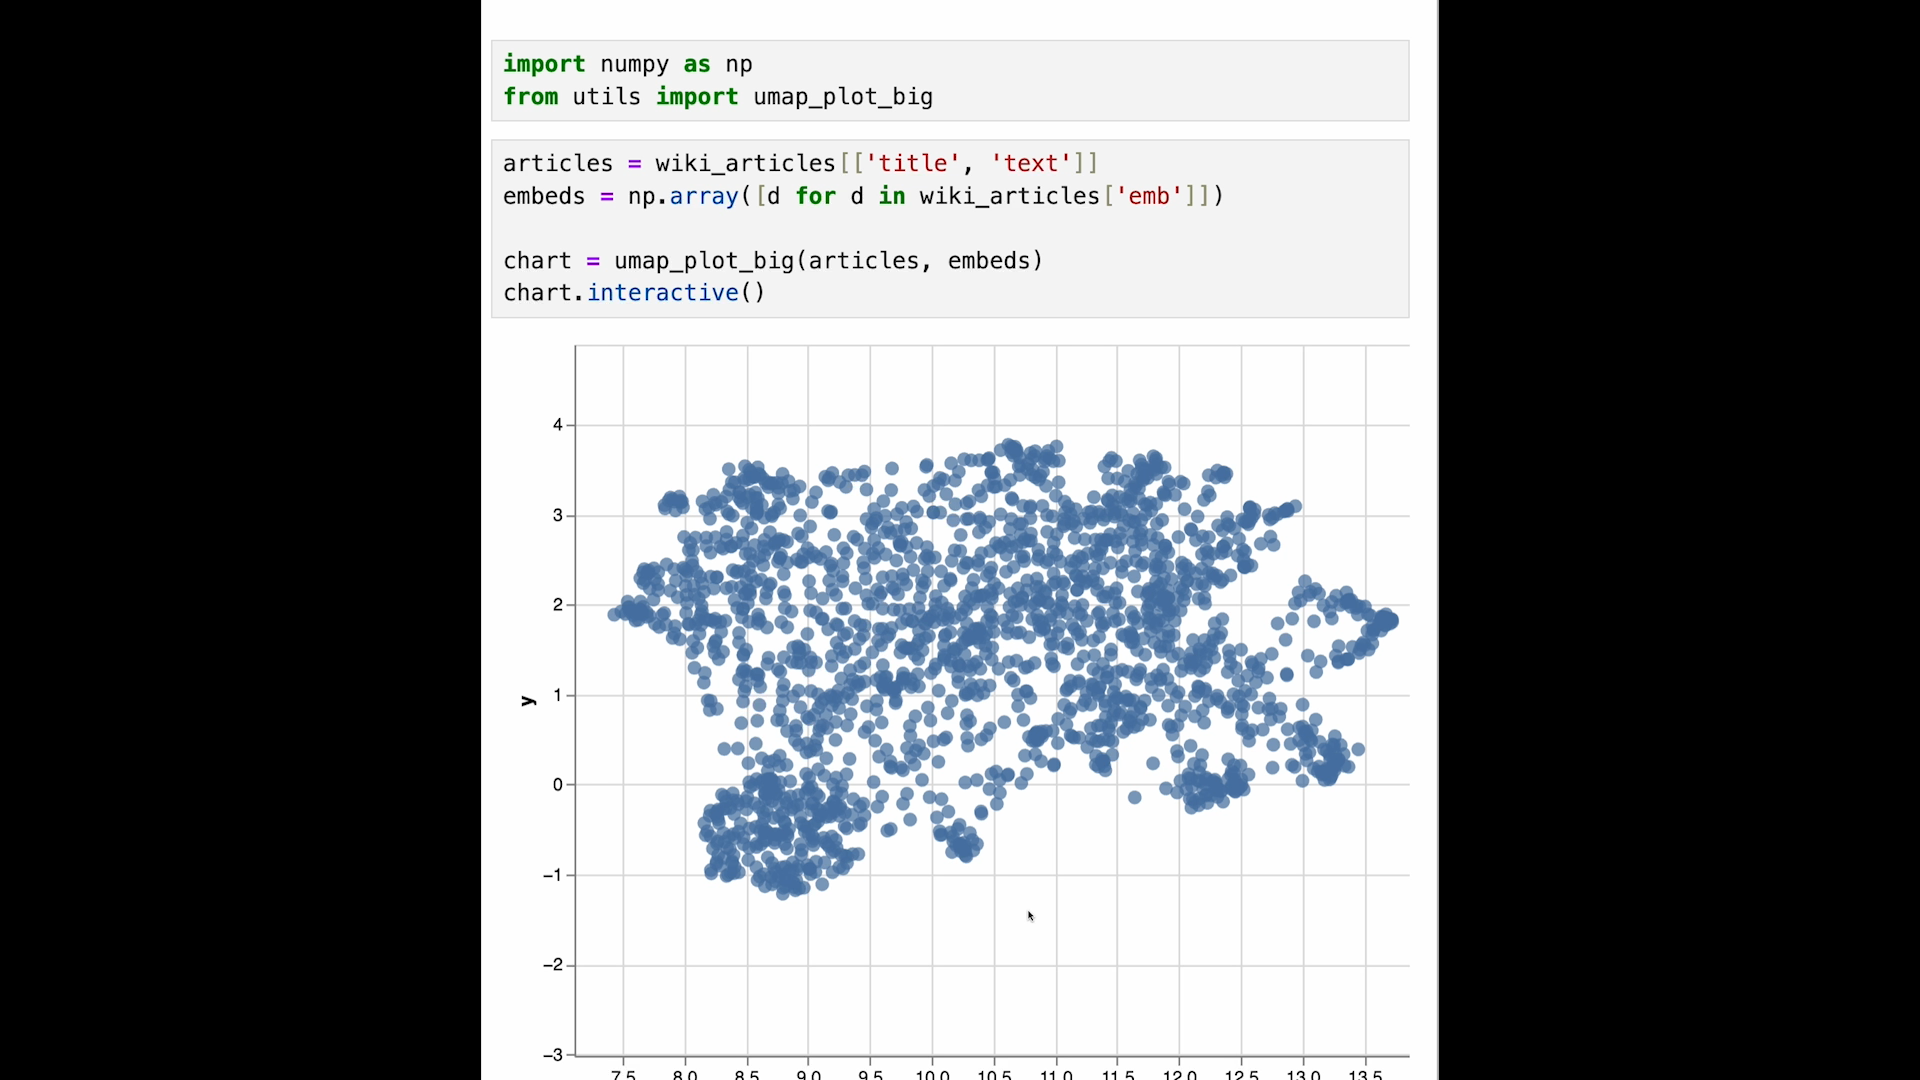